In [1]:
import numpy as np 

In [2]:
Label2Image = {
    0 : "Bear",
    1 : "Chips",
    2 : "Coke",
    3 : "Drink",
    4 : "Sprite",
    5 : "Turkey Noodles" 
}

Label2Price = {
    0 : 6,
    1 : 3.5,
    2 : 2.5,
    3 : 5,
    4 : 5.5,
    5 : 8
}

In [3]:
X_np = np.load('X_np.npy')
labels_np = np.load('labels_np.npy')

print(X_np.shape)
print(labels_np.shape)

(347, 224, 224, 3)
(347, 1)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [5]:
Image, Label = shuffle(X_np, labels_np)

In [6]:
print("image size : ", Image.shape)
print("label size : ", Label.shape)

image size :  (347, 224, 224, 3)
label size :  (347, 1)


In [7]:
import matplotlib.pyplot as plt

def show_image(image):
    plt.axis("off")
    plt.imshow(image[:, :, ::-1])

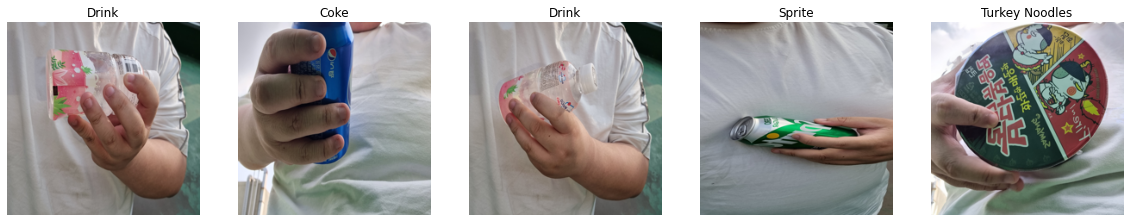

In [8]:
plt.figure(figsize = (20, 4))

for i in range(5):
    plt.subplot(1, 5, i+1)
    show_image(Image[i])
    plt.title(Label2Image[Label[i][0]])

In [9]:
from keras.utils import to_categorical

Image_normalize = Image.astype(float) / 255
label_categorical = to_categorical(Label)

Using TensorFlow backend.
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [10]:
from keras.models import load_model

In [ ]:
model = load_model('Vgg16.h5')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
model.evaluate(Image_normalize, label_categorical)

In [ ]:
Count = 0
plt.figure(figsize = (20, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    show_image(Image[i])
    label = model.predict_classes(Image_normalize[i].reshape([1, 224, 224, 3]))
    plt.title(str(Label2Image[label[0]]) + " : "+ str(Label2Price[label[0]]))
    Count += Label2Price[label[0]]

print("Total Price is : ", Count, "$")
print("*"*92)

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
Algotithm = ['SVM', 'Vgg16', 'ResNet', 'Simple-CNN']
Correct = np.array([[1, 0.6], [0.987, 0.981], [1, 0.72], [1, 0.82]])

plt.bar(Algotithm, Correct[:, 0], label = "train")
plt.bar(Algotithm, Correct[:, 1], label = 'test')
plt.legend()

In [ ]:
Time = [50, 185, 308, 254]
plt.bar(Algotithm, Time)